In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


/tmp/ipykernel_5519/3428942495.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


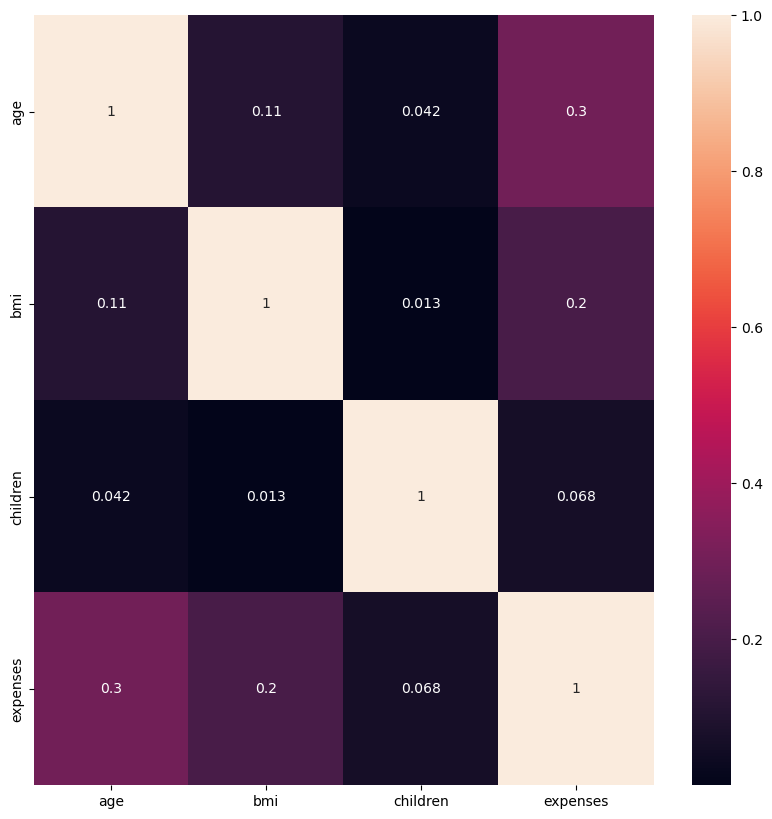

In [4]:
fig , ax=plt.subplots(figsize=(10,10))

corr=df.corr()

sns.heatmap(corr,annot=True , ax=ax)

In [5]:
d_type=dict(df.dtypes)
d_type

{'age': dtype('int64'),
 'sex': dtype('O'),
 'bmi': dtype('float64'),
 'children': dtype('int64'),
 'smoker': dtype('O'),
 'region': dtype('O'),
 'expenses': dtype('float64')}

In [6]:
d_type=dict(df.dtypes)
for name , type_ in d_type.items():
    if str(type_)=='object':
        print(f"<----------------{name}------------>")
        print(df[name].value_counts())
        print()

<----------------sex------------>
male      676
female    662
Name: sex, dtype: int64

<----------------smoker------------>
no     1064
yes     274
Name: smoker, dtype: int64

<----------------region------------>
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [7]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_type.items():
    if str(type_)=='object':
        Le=LabelEncoder()
        df[name]=Le.fit_transform(df[name])
        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [9]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [10]:
X.shape

(1338, 6)

In [11]:
Y.shape

(1338,)

In [12]:
from sklearn.model_selection import train_test_split

Xtrain ,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

Xtain=scaler.fit_transform(Xtrain)
Xtest=scaler.fit_transform(Xtest)

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(Xtain,ytrain)



LinearRegression()

In [28]:
model.coef_

array([3732.1576253 , -180.9623548 , 1947.05093741,  491.85992684,
       9879.91019114, -493.7954718 ])

In [31]:
model.predict(Xtest[10,:].reshape(1,-1))

array([3777.0865106])